# Trabalho Final de Análise Preditiva
#####Professor : Álvaro Riz
#####Aluna: Joyce Alves Durão

### Neste trabalho será realizado uma análise dos dados referentes a Seguradora LGSY, para traçar um modelo preditivo dos tipos de uso de serviços oferecidos pela seguradora.


######Fonte dos dados a serem carregados disponível em:
###### https://github.com/alvaroriz/datascience_datasets/blob/main/Classificacao_Uso_De_Seguro.xlsx?raw=true

##### Importando as bibliotecas necessárias para modelagem de dados (Pandas), obtenção de recursos matemáticos (Numpy), criação de gráficos e visualização de dados (Matplotlib e Seaborn) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Carregando o Dataset

In [ ]:
data = pd.read_excel('https://github.com/alvaroriz/datascience_datasets/blob/main/Classificacao_Uso_De_Seguro.xlsx?raw=true')

##### Verificando o Dataset

In [ ]:
data

,Idade,Preço Seguro,CEP,Serviço
0,69,3930,19005,3
1,27,3336,19027,1
2,49,3936,19001,3
3,60,157,19009,1
4,51,3998,19050,2
...,...,...,...,...
495,24,389,19026,1
496,47,967,19022,1
497,58,1520,19019,2
498,72,3155,19029,3


Os dados são constituídos de 500 linhas e 4 colunas.

##### Conhecendo as variáveis e traçando algumas estatísticas básicas

In [ ]:
data.describe().round(2)

,Idade,Preço Seguro,CEP,Serviço
count,500.00,500.00,500.00,500.00
mean,49.55,1939.27,19024.81,1.90
std,18.17,1402.29,15.08,0.86
min,18.00,100.00,19000.00,1.00
25%,33.75,612.00,19011.00,1.00
50%,51.00,1667.50,19025.00,2.00
75%,65.00,3329.50,19038.00,3.00
max,80.00,3998.00,19050.00,3.00


Um dos pontos importantes, é verificar se a escala da variável dependente, ponto focal do estudo, possui suas observações dentro da escala pré-definida (1,2 ou3). A partir das informações acima podemos notar que a classificação de serviço está sempre dentra da escala, que varia entre 1, 2 e 3, não havendo assim, nenhum erro a ser corrigido.

##### Verificando como estão classificadas as variáveis (tipo)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Idade         500 non-null    int64
 1   Preço Seguro  500 non-null    int64
 2   CEP           500 non-null    int64
 3   Serviço       500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


Os dados, excluindo-se o nome de suas colunas, estão todos classificados como inteiros, não havendo necessidade de transformações (caso de variáveis categóricas) para que sejam feitas as análises.

Verificando se há valores ausentes nas células que possam interferir nas análises:

In [ ]:
data.isna().sum().sum()

0

Não há valores ausentes a serem tratados.

## Histogramas
Abaixo temos a distribuição de frequência de observações em cada variável. 

> Na frequência relacionada a idades temos que o maior público concentra-se na faixa etária entre 54 e 56 anos.
Bloco com recuo



> Em relação ao preço do seguro, os maiores montantes concentram-se nas extremidades, abaixo do valor de 1000 e acima de 3000.


> As informações sobre o CEP pouco, ou quase nada agregam ao estudo, mostrando apenas algumas concentrações sem nenhuma tendência relevantes.


> Por último temos o tipo de serviço, em que podemos ver uma concentração maior no tipo 1.












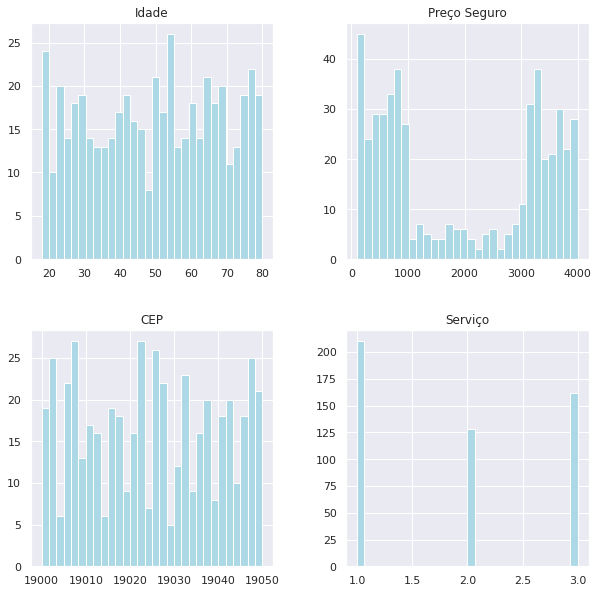

In [ ]:
sns.set(font_scale=1.0, rc={'figure.figsize':(10,10)})
eixo = data.hist(bins=30, color='lightblue')

## Histograma da variável dependente

Aqui podemos notar que o Serviço do Tipo 1 apresenta a maior frequência de observações, seguido pelo Tipo 3 e por último, pelo tipo 2.




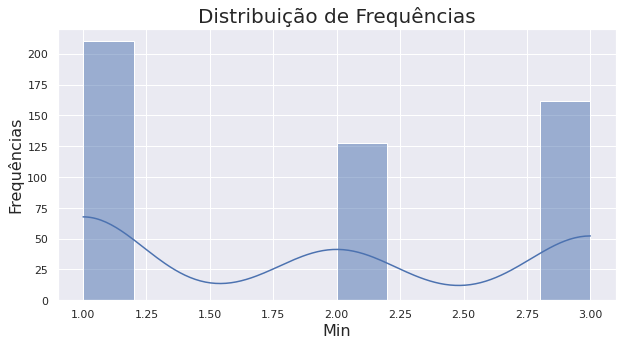

In [ ]:
ax = sns.histplot(data['Serviço'], kde=True)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Frequências', fontsize=16)
ax.set_xlabel('Min', fontsize=16)
ax

## Vendo a correlação entre as variáveis.
A partir da correlação abaixo calculada, podemos notar que a única variável que possui uma correlação forte e satisfatória é o preço do seguro, significando que, alterações no valor do preço do seguro irão interfeir diretamente no tipo de serviço a ser contratado.

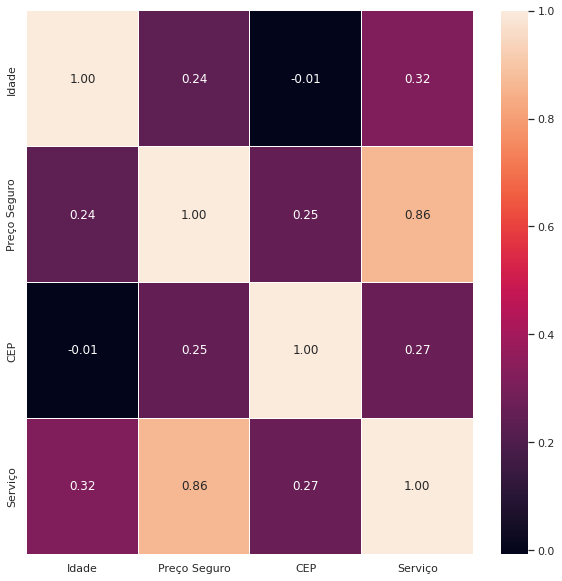

In [ ]:
correlation = data.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".2f", linewidths=.1)
plot

Com um pouco mais de casas decimais...

In [ ]:
correlation

,Idade,Preço Seguro,CEP,Serviço
Idade,1.000000,0.239784,-0.007690,0.317317
Preço Seguro,0.239784,1.000000,0.250562,0.862361
CEP,-0.007690,0.250562,1.000000,0.265624
Serviço,0.317317,0.862361,0.265624,1.000000


Como encontramos apenas uma variável que possui correlação forte com a variável dependente, um modelo de predição eficiente para o caso será o de regressão linear simples, que explica a relação de uma variável dependente, através de uma independente na qual possui uma correlação forte.

### Box Plot relacionando Tipo de Serviço e Preço do Seguro
(correlação alta)

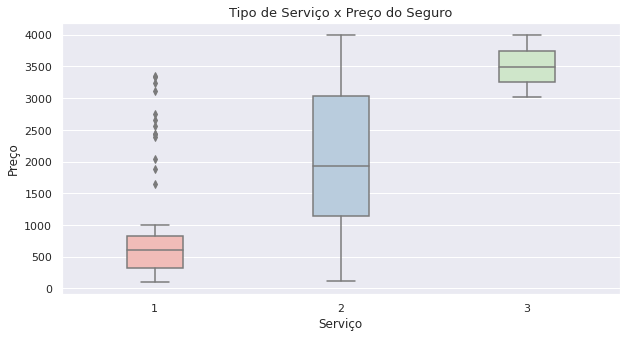

In [ ]:
ax = sns.boxplot(y='Preço Seguro', x='Serviço', data=data, palette='Pastel1', width=0.3)
ax.figure.set_size_inches(10, 5)
ax.set_title('Tipo de Serviço x Preço do Seguro', fontsize=13)
ax.set_ylabel('Preço', fontsize=12)
ax.set_xlabel('Serviço', fontsize=12)
ax

Podemos conferir a partir do gráfico acima que para o tipo de serviço 1 temos vários outliers para o preço do seguro, ou seja, várias observações que se destacam, são discrepantes, do conjunto de dados total. Já nos outros, os preços apresentam-se distribuídos dentro do conjunto de dados sem possuir outliers, sendo que no tipo 3, a média do preço do seguro possivelmente se aproxima da mediana.

# Modelo de Regressão Linear

Importando o modelo de treinamento e teste da biblioteca do scikit-learn para separar a base de dados em treinamento e teste.


In [ ]:
from sklearn.model_selection import train_test_split

### Criando uma Series (pandas) para armazenar a variável dependente (y)

In [ ]:
y = data['Serviço']

### Definindo um DataFrame com as variáveis independentes

In [ ]:
 X = data[['Idade','Preço Seguro', 'CEP']]

### Datasets de Treinamento e Teste
Aqui iremos definir os datasets de treinamento e teste e, para que se possa acessar o mesmo dataset selecionado aleatoriamente, definimos um número (escolha individual) para o random state.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

Verificando a quantidade de observações de treinamento em X_train (terá que corresponder a 70% das observações uma vez que o teste ocorre com 30%)

In [ ]:
X_train.shape

(350, 3)

Até aqui, ok. 350 correspondem a 70% das observações voltadas para o treinamento do modelo.

### Importando o modelo de regressão linear no Scikit-learn e Metrics


In [ ]:
from sklearn.linear_model import LinearRegression 

### Instanciando a classe 'LinearRegression()' do modelo de regressão do Scikit-learn

In [ ]:
model = LinearRegression()

### Treinando o modelo usando o método fit() para estimar o modelo linear através dos dados de treino: (y_train e X_train)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino

In [ ]:
from sklearn import metrics

In [ ]:
r_score = model.score(X_train, y_train).round(3)
r_score

0.736

O coeficiente de determinação acima nos traz a informação de que o modelo aplicado explica 73,6% da variância da variável dependente a partir das variáveis independentes, caracterizando-se assim em um bom modelo preditivo.

### Hora de gerar previsões para o modelo com o método 'predict()'

In [ ]:
y_previsto = model.predict(X_test)

### Coeficiente de determinação (R²) para as previsões do modelo

In [ ]:
erre2 = metrics.r2_score(y_test, y_previsto).round(3)
erre2

0.808

Mais uma vez o coeficiente de determinação apresentou um resultado favorável ao modelo aplicado, já que o R² do mo modelo de previsão ficou em 80,8%.

### Inserindo alguns dados para testar o modelo

In [ ]:
Idade = input('Digite a idade ')
Preco_Seguro = input('Digite o valor do seguro (mínimo de 100) ')
CEP = input('Digite o CEP com 5 algarismos ')

entrada = [[Idade,Preco_Seguro,CEP]]
resultado_prev = round(model.predict(entrada)[0],0)
print('Tipo de Serviço =', resultado_prev)

Digite a idade 41
Digite o valor do seguro (mínimo de 100) 3000
Digite o CEP com 5 algarismos 19003
Tipo de Serviço = 2.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


### Salvando o modelo com o Pickle

In [ ]:
import pickle

In [ ]:
output = open('modelo_seguradora_LGSY', 'wb') 
pickle.dump(model, output) 
output.close() 

### Avaliando outros modelos
 Primeiramente, importo as bibliotecas referentes às regressões de RandomForest e GradientBoosting no sklearn.ensemble, além do XGBRegressoe a partir do xgboost e LGBMRegressor do lightgbm para avaliar qual melhor modelo será aplicado, através da assertividade do teste calculado pelo r2 score.

Obs importante: os modelos abaixo podem ser rodados pois já foram criados anteriormente os datasets de treino e teste. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score

In [ ]:
#Instancio os modelos
modelo_RF = RandomForestRegressor(max_depth=10, max_leaf_nodes=20, random_state=15) 
modelo_GR = GradientBoostingRegressor(max_depth=10, max_leaf_nodes=20, random_state=15) 
modelo_XG = XGBRegressor(max_depth=10, max_leaf_nodes=20, random_state=15) 
modelo_LG = LGBMRegressor(max_depth=10, max_leaf_nodes=20, random_state=15) 

#Importo as funcoes de tempo para podermos marcar o tempo de treinamento
import time


print('-'*10+' Randon Forest '+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_RF.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_RF.predict(X_train) # Predição para o treino 
y_pred_test = modelo_RF.predict(X_test) # Predição para o teste

#Exibo as previsões para treino e teste
print('Assertividade para o Treino: ', r2_score(y_train, y_pred_train))
print('Assertividade para o Teste: ', r2_score(y_test, y_pred_test))
print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')


print('-'*10+' Gradient Boosting '+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_GR.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_GR.predict(X_train) # Predição para o treino 
y_pred_test = modelo_GR.predict(X_test) # Predição para o teste

#Exibo as previsões para treino e teste
print('Assertividade para o Treino: ', r2_score(y_train, y_pred_train))
print('Assertividade para o Teste: ', r2_score(y_test, y_pred_test))
print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')

print('-'*10+' XGBRegressor '+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_XG.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_XG.predict(X_train) # Predição para o treino 
y_pred_test = modelo_XG.predict(X_test) # Predição para o teste

#Exibo as previsões para treino e teste
print('Assertividade para o Treino: ', r2_score(y_train, y_pred_train))
print('Assertividade para o Teste: ', r2_score(y_test, y_pred_test))
print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')

print('-'*10+' LGBMRegressor '+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_LG.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_LG.predict(X_train) # Predição para o treino 
y_pred_test = modelo_LG.predict(X_test) # Predição para o teste

#Exibo as previsões para treino e teste
print('Assertividade para o Treino: ', r2_score(y_train, y_pred_train))
print('Assertividade para o Teste: ', r2_score(y_test, y_pred_test))
print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')

---------- Randon Forest ----------
Assertividade para o Treino:  0.9337621895228927
Assertividade para o Teste:  0.7802690436402447
Trempo de treinamento:  0.1381511688232422


---------- Gradient Boosting ----------
Assertividade para o Treino:  0.9993156760827538
Assertividade para o Teste:  0.6879369728883435
Trempo de treinamento:  0.07928013801574707


---------- XGBRegressor ----------
[15:08:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Assertividade para o Treino:  0.9999896272389004
Assertividade para o Teste:  0.6921212886115907
Trempo de treinamento:  0.15096282958984375


---------- LGBMRegressor ----------
Assertividade para o Treino:  0.9238388309384664
Assertividade para o Teste:  0.8086111627858554
Trempo de treinamento:  0.04584050178527832




Sendo assim, dentre todos os modelos apresentados aquele que obteve melhor desempenho foi o LGBMregressor, onde, realizando as análises em relação à assertividade ao treino e ao teste, este obteve resultados mais eficientes, com assertividades em 0.92 e em 0.88, respectivamente. eficientes.

### Salvando este modelo com o Pickle

In [ ]:
import pickle

In [ ]:
output = open('modelo_seguradora_LGSY_LGBMRegressor', 'wb') 
pickle.dump(modelo_LG, output) 
output.close()

In [ ]:
modelo = open('modelo_seguradora_LGSY_LGBMRegressor', 'rb') #Falo qual é o modelo
modeloCarregado = pickle.load(modelo) #Carrego o modelo
modelo.close()

# Importo as bibliotecas necessárias
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Crio os controles do formulário
Idade = widgets.Text(description="Idade")
Preco_Seguro = widgets.Text(description="Preço do seguro")
CEP = widgets.Text(description="CEP")
botao = widgets.Button(description="Prever")

# Posicionando os campos na tela
left = VBox([Idade,Preco_Seguro,CEP])
inputs = HBox([left])

# Função de para executar a predicao
def preditor(sender):
    entrada=[[
                int(Idade.value if Idade.value else 0), 
                float(Preco_Seguro.value if Preco_Seguro.value else 0), 
                int(CEP.value if CEP.value else 0)
             ]]
    print('Serviço: {0:.0f}'.format(modeloCarregado.predict(entrada)[0]))
    
# Atribuindo a função "preditor" ao evento click do botão
botao.on_click(preditor)

In [ ]:
display(inputs, botao)

Button(description='Prever', style=ButtonStyle())

Serviço: 2
